## Huffman Coding

Huffman coding is a compression algorithm that can be used to compress lists of characters.

In a normal, uncompressed text, each character is represented by the same number of bits (usually eight). In Huffman coding, each character can have a bit representation of a different length, depending on how common a character is: the characters that appear often in a text are represented by a shorter bit sequence than those being used more rarely. Every huffman code defines the specific bit sequences used to represent each character.

A Huffman code can be represented by a binary tree whose leaves represent the characters that should be encoded. The code tree below can represent the characters A to H.

The leaf nodes have associated with them a weight which denotes the frequency of appearance of that character. In the example below, the character A has the highest weight 8, while F for example has weight 1.

Every branching node of the code tree can be thought of as a set containing the characters present in the leaves below it. The weight of a branching node is the total weight of the leaves below it: this information is necessary for the construction of the tree.



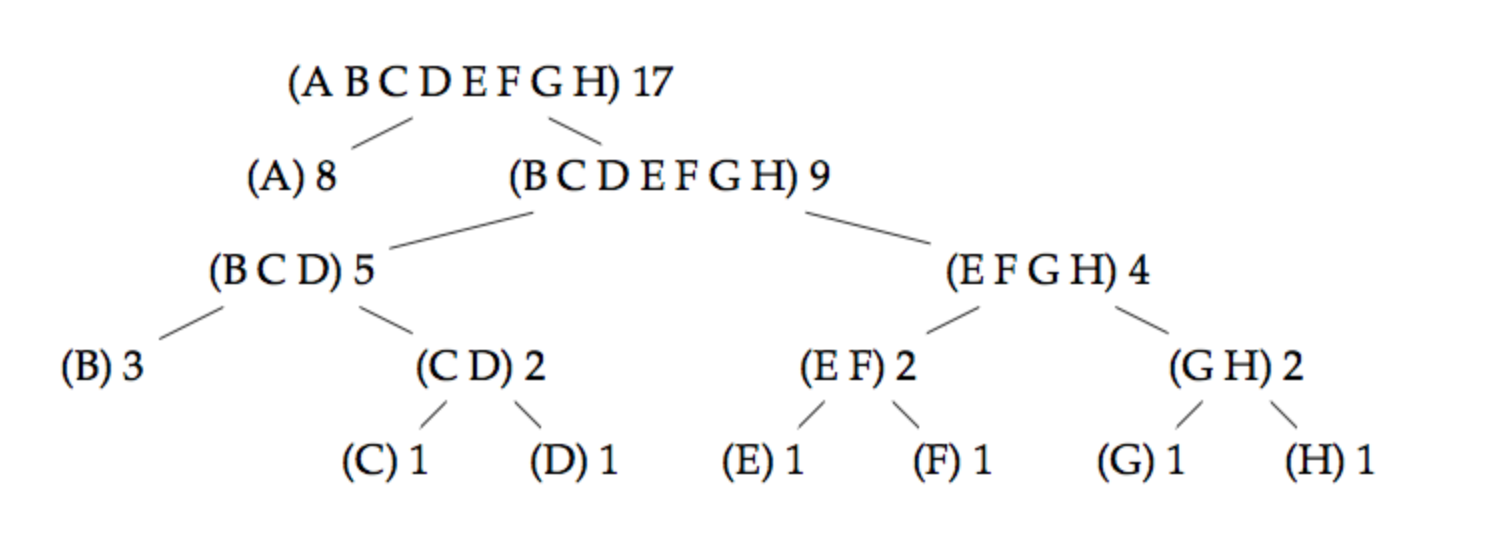

Note that a given encoding is only optimal if the character frequencies in the encoded text match the weights in the code tree.

Finally, observe the recursive structure of the coding tree: every sub-tree is itself a valid code tree for a smaller alphabet.

**Encoding**

For a given Huffman tree, one can obtain the encoded representation of a character by traversing from the root of the tree to the leaf containing the character. Along the way, when a left branch is chosen, a 0 is added to the representation, and when a right branch is chosen, 1 is added to the representation. Thus, for the Huffman tree above, the character D is encoded as 1011.

**Decoding**

Decoding also starts at the root of the tree. Given a sequence of bits to decode, we successively read the bits, and for each 0, we choose the left branch, and for each 1 we choose the right branch. When we reach a leaf, we decode the corresponding character and then start again at the root of the tree. As an example, given the Huffman tree above, the sequence of bits, 10001010 corresponds to BAC.

### Implementation

In Scala, a Huffman tree can be represented as follows:

  ```scala
    abstract class CodeTree
    case class Fork (left: CodeTree, right: CodeTree, chars: List[Char], weight: Int) extends CodeTree
    case class Leaf(char: Char, weight: Int) extends CodeTree
  ```

To begin, implement the following two (hint: very simple) functions using pattern matches on the code tree:
  1. weight which returns the total weight of a given Huffman tree. 
  ```scala
    def weight(tree: CodeTree): Int = tree match ...
  ```

  2. chars which returns the list of characters defined in a given Huffman tree. 
  ```scala
    def chars(tree: CodeTree): List[Char] = tree match ...
  ```

Using these functions, it's possible to define makeCodeTree, a function which facilitates the creation of Huffman trees by automatically calculating the list of characters and the weight when creating a node. This function is already implemented in the handout template:

```scala
def makeCodeTree(left: CodeTree, right: CodeTree) =
  Fork(left, right, chars(left) ::: chars(right), weight(left) + weight(right))
```

Using `makeCodeTree`, code trees can be constructed manually in the following way:

```scala
val sampleTree = makeCodeTree(
  makeCodeTree(Leaf('x', 1), Leaf('e', 1)),
  Leaf('t', 2)
)
```

### Constructing Huffman Trees

Given a text, it's possible to calculate and build an optimal Huffman tree in the sense that the encoding of that text will be of the minimum possible length, meanwhile keeping all information (i.e., it is lossless).

To obtain an optimal tree from a list of characters, you have to define a function createCodeTree with the following signature:

```scala
  def createCodeTree(chars: List[Char]): CodeTree = ...
```

Proceed with the following steps to break up this assignment into smaller parts (the handout template contains more detailed documentation):

1.  Begin by writing a function times which calculates the frequency of each character in the text: 
```scala
  def times(chars: List[Char]): List[(Char, Int)] = ...
```

2. Then, write a function `makeLeafList` which generates a list containing all the leaves of the Huffman tree to be constructed (the case `Leaf` of the algebraic datatype `CodeTree`). The list should be ordered by ascending weights where the weight of a leaf is the number of times (or the frequency) it appears in the given text. 
```scala
  def makeOrderedLeafList(freqs: List[(Char, Int)]): List[Leaf] = ...
```

3. Write a simple function singleton which checks whether a list of code trees contains only one single tree. 
```scala
  def singleton(trees: List[CodeTree]): Boolean = ...
```

4. Write a function `combine` which (1) removes the two trees with the lowest weight from the list constructed in the previous step, and (2) merges them by creating a new node of type `Fork`. Add this new tree to the list - which is now one element shorter - while preserving the order (by weight). 
```scala
  def combine(trees: List[CodeTree]): List[CodeTree] = ...
```

5. Write a function `until` which calls the two functions defined above until this list contains only a single tree. This tree is the optimal coding tree. The function until can be used in the following way: `until(singleton, combine)(trees)` where the argument `trees` is of the type `List[CodeTree]`.

6. Finally, use the functions defined above to implement the function createCodeTree which respects the signature shown above.

### Decoding

Define the function decode which decodes a list of bits (which were already encoded using a Huffman tree), given the corresponding coding tree.

```scala
  type Bit = Int
  def decode(tree: CodeTree, bits: List[Bit]): List[Char] = ...
```

Use this function and the `frenchCode` code tree to decode the bit sequence in `secret`. Store the resulting character sequence in `decodedSecret`.

### Encoding

This section deals with the Huffman encoding of a sequence of characters into a sequence of bits.

##### ...using a Huffman Tree

Define the function encode which encodes a list of characters using Huffman coding, given a code tree.

```scala 
  def encode(tree: CodeTree)(text: List[Char]): List[Bit] = ...
```

Your implementation must traverse the coding tree for each character, a task that should be done using a helper function.

#### ...using a Coding Table

The previous function is simple, but very inefficient. You goal is now to define `quickEncode` which encodes an equivalent representation, but more efficiently.

```scala
  def quickEncode(tree: CodeTree)(text: List[Char]): List[Bit] = ...
```

Your implementation will build a coding table once which, for each possible character, gives the list of bits of its code. The simplest way - but not the most efficient - is to encode the table of characters as a list of pairs.

```scala
  type CodeTable = List[(Char, List[Bit])]
```

The encoding must then be done by accessing the table, via a function `codeBits`.

```scala
  def codeBits(table: CodeTable)(char: Char): List[Bit] = ...
```

The creation of the table is defined by `convert` which traverses the coding tree and constructs the character table.

```scala
  def convert(t: CodeTree): CodeTable = ...
```

Implement the function `convert` by using the function `mergeCodeTables` below:

```scala
  def mergeCodeTables(a: CodeTable, b: CodeTable): CodeTable = ...
```